# Compulsory Task 1: Movies EDA Task



Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [573]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [574]:
# Load the movies dataset 
movies_df = pd.read_csv('movies.csv')

movies_df.shape

(4803, 20)

In [575]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [576]:
# Drop unnecessary columns
movies_df.drop(['homepage', 'keywords', 'original_language', 
                'original_title', 'overview', 'production_companies', 
                'status', 'tagline'], axis=1, inplace=True)
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


In [577]:
# Checking which columns have missing values

print('\nColumns with missing values: ')
print(movies_df.isnull().any())


Columns with missing values: 
budget                  False
genres                  False
id                      False
popularity              False
production_countries    False
release_date             True
revenue                 False
runtime                  True
spoken_languages        False
title                   False
vote_average            False
vote_count              False
dtype: bool


In [578]:
# Checking how much missing values there are in the columns and if it will have a huge impact to remove them

print('\nColumns with sum of missing values: ')
print(movies_df.isnull().sum())


Columns with sum of missing values: 
budget                  0
genres                  0
id                      0
popularity              0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
title                   0
vote_average            0
vote_count              0
dtype: int64


In [579]:
# Dropping the rows with missing data for the 2 columns that were identified

movies_df.dropna(subset=["release_date", "runtime"], inplace=True)
print('\nColumns with sum of missing values: ')
print(movies_df.isnull().sum())


Columns with sum of missing values: 
budget                  0
genres                  0
id                      0
popularity              0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
title                   0
vote_average            0
vote_count              0
dtype: int64


#### Remove any duplicate rows

In [580]:
# Remove duplicate rows
movies_df.drop_duplicates(inplace=True)
movies_df.shape

(4800, 12)

#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [581]:
# Remove rows with missing data
movies_df.drop(movies_df.index[(movies_df['budget'] == 0)], axis=0, inplace=True)
movies_df.drop(movies_df.index[(movies_df['revenue'] == 0)], axis=0, inplace=True)

# checking shape after rows with zero budget and zero revenue were removed
movies_df.shape

(3229, 12)

#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [640]:
# Change the release_date column to DateTime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

# Extract the release year from every release date
movies_df['release_year'] = movies_df['release_date'].dt.year

print(movies_df.query('release_year != 0').groupby(['release_year'])['release_year'].count())

release_year
1916      1
1925      1
1927      1
1929      1
1930      1
       ... 
2012    137
2013    152
2014    135
2015    121
2016     72
Name: release_year, Length: 89, dtype: int64


Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [583]:
# determining what the data types are for the data that was imported
movies_df.dtypes

budget                           int64
genres                          object
id                               int64
popularity                     float64
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
title                           object
vote_average                   float64
vote_count                       int64
release_year                     int32
dtype: object

In [584]:
movies_df['budget'] = movies_df['budget'].astype(np.int64)
movies_df['revenue'] = movies_df['revenue'].astype(np.int64)
movies_df['release_year'] = movies_df['release_year'].astype(np.int64)

print(movies_df['budget'].dtype)
print(movies_df['revenue'].dtype)
print(movies_df['release_year'].dtype)

int64
int64
int64


In [585]:
# checking if all the data types are now imported correctly
movies_df.dtypes

budget                           int64
genres                          object
id                               int64
popularity                     float64
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
title                           object
vote_average                   float64
vote_count                       int64
release_year                     int64
dtype: object

On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [586]:
# Convert from JSON format to a list of strings
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index, movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index, column] = str(list1)
    
# Flatten data in columns
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('spoken_languages', 'name')

In [587]:
# Inspect flattened data
movies_df.sample(1)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
2243,20000000,"['Drama', 'Music']",3902,13.032308,['United States of America'],2007-10-01,4001121,135.0,['English'],I'm Not There.,6.6,195,2007


### Finding Certain Genres
Locate all movies in the "Action" genre. 

In [588]:
# Create a dataframe with all the movies in the "Action" genre
action_movies = movies_df[movies_df['genres'].str.contains('Action')]
action_movies.sample(1)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
930,50000000,"['Action', 'Thriller', 'Mystery']",225574,83.295796,"['France', 'United Kingdom', 'United States of...",2014-01-26,222809600,106.0,"['English', 'Deutsch']",Non-Stop,6.8,2268,2014


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive movies? 

How do the most expensive and cheapest movies compare? Exploring the most expensive movies highlights if some movies are worth the money spent on them based on their performance and revenue generated.

In [643]:
# Create a temp data base with the relevant columns
movies_budget = movies_df.query('revenue != 0' and 'budget != 0')

# Selecting relevant columns for analysis
movies_budget = movies_budget[['budget', 'revenue', 'title']]

# Display the top 5 observations from the new data base
movies_budget.head()

,budget,revenue,title
0,237000000,2787965087,Avatar
1,300000000,961000000,Pirates of the Caribbean: At World's End
2,245000000,880674609,Spectre
3,250000000,1084939099,The Dark Knight Rises
4,260000000,284139100,John Carter


In [644]:
# descriptive statistics for the new data frame
movies_budget.describe()

,budget,revenue
count,3.229000e+03,3.229000e+03
mean,4.065444e+07,1.212430e+08
std,4.439674e+07,1.863029e+08
min,1.000000e+00,5.000000e+00
25%,1.050000e+07,1.700000e+07
50%,2.500000e+07,5.518472e+07
75%,5.500000e+07,1.462920e+08
max,3.800000e+08,2.787965e+09


In [645]:
# Get the 5 most expensive movies
expensive_movies = movies_budget.nlargest(5, 'budget')

# Display top 5 expensive movies based on the budget
expensive_movies.head()

,budget,revenue,title
17,380000000,1045713802,Pirates of the Caribbean: On Stranger Tides
1,300000000,961000000,Pirates of the Caribbean: At World's End
7,280000000,1405403694,Avengers: Age of Ultron
10,270000000,391081192,Superman Returns
4,260000000,284139100,John Carter


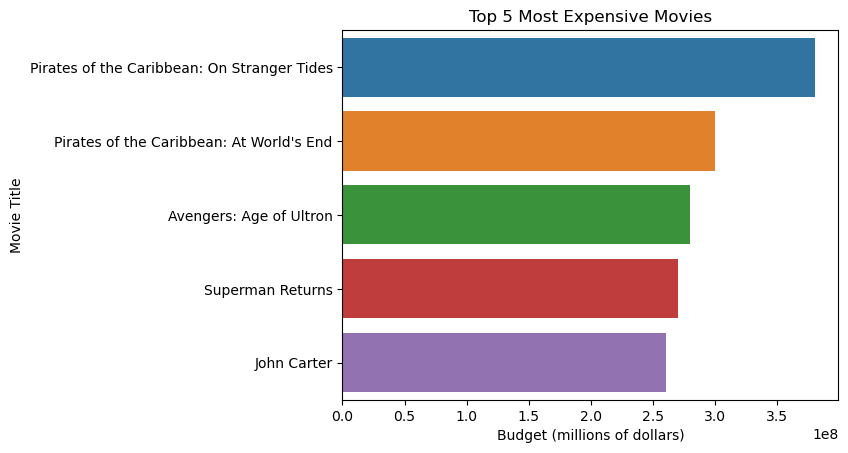

In [646]:
# Create a bar plot of the top 5 most expensive movies
sns.barplot(y="title", x="budget", data=expensive_movies)

# Add a title and labels to the plot
plt.title("Top 5 Most Expensive Movies")
plt.xlabel("Budget (millions of dollars)")
plt.ylabel("Movie Title")

# Show the plot
plt.show()

In [647]:
# Get the 5 most cheapest movies
cheapest_movies = movies_budget.nsmallest(5, 'budget')

# Display top 5 cheapest movies by title
cheapest_movies.head()

,budget,revenue,title
4238,1,8500000,Modern Times
3611,4,25,A Farewell to Arms
3372,7,5,Split Second
3419,7,7,Bran Nue Dae
4608,8,16,The Prophecy


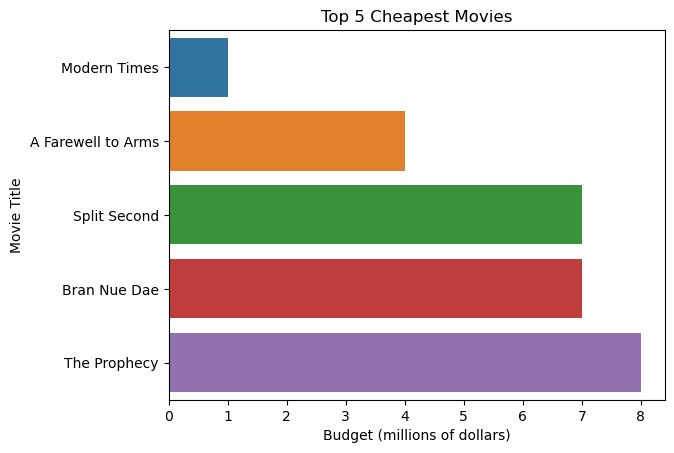

In [594]:
# Create a bar plot of the top 5 cheapest movies
sns.barplot(y="title", x="budget", data=cheapest_movies)

# Add a title and labels to the plot
plt.title("Top 5 Cheapest Movies")
plt.xlabel("Budget (millions of dollars)")
plt.ylabel("Movie Title")

# Show the plot
plt.show()

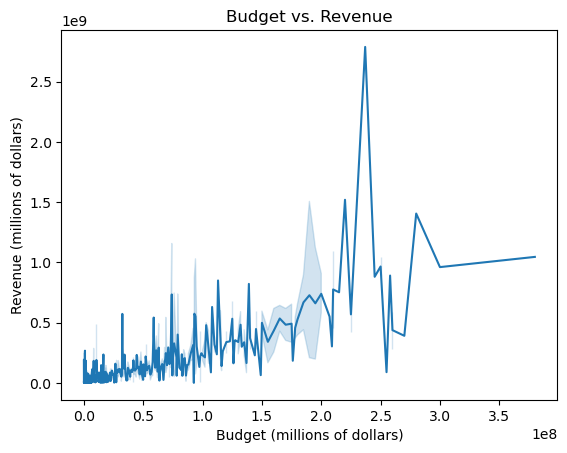

In [648]:
# Create a linegraph that compares the budget vs the revenue 
sns.lineplot(x="budget", y="revenue", data=movies_budget)

# Add a title and labels to the plot
plt.title("Budget vs. Revenue")
plt.xlabel("Budget (millions of dollars)")
plt.ylabel("Revenue (millions of dollars)")

# Show the plot
plt.show()

# Conclusion

The graph shows that there is no clear correlation between budget and revenue. Some of the most expensive movies have been box office failures, while some of the cheapest movies have been huge successes.

#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [596]:
# Create a temp data base with the relevant columns
movies_profit = movies_df.query('revenue != 0' and 'budget != 0')

# Selecting relevant columns for analysis
movies_profit = movies_profit[['budget', 'revenue', 'title']]

# Creating a new column 'profit' and calculating the data for this column
movies_profit['profit'] = movies_profit['revenue'] - movies_profit['budget']

# Get the top 5 most profitable movies from the 'profit' column
most_profitable_movies = movies_profit.nlargest(5, 'profit')

# Print the results
most_profitable_movies.head()

,budget,revenue,title,profit
0,237000000,2787965087,Avatar,2550965087
25,200000000,1845034188,Titanic,1645034188
28,150000000,1513528810,Jurassic World,1363528810
44,190000000,1506249360,Furious 7,1316249360
16,220000000,1519557910,The Avengers,1299557910


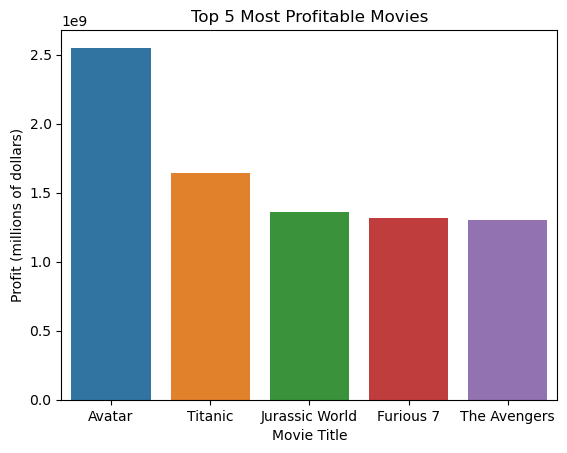

In [597]:
# Create a bar plot of the top 5 most profitable movies
sns.barplot(x="title", y="profit", data=most_profitable_movies)

# Add a title and labels to the plot
plt.title("Top 5 Most Profitable Movies")
plt.xlabel("Movie Title")
plt.ylabel("Profit (millions of dollars)")
# Show the plot
plt.show()

In [598]:
# Get the min profits
min_profit = movies_profit['profit'].min()

print("Min profit:", min_profit)

Min profit: -165710090


In [599]:
# Get the max profits
max_profit = movies_profit['profit'].max()

print("Max profit:", max_profit)

Max profit: 2550965087


In [600]:
# Calculate the difference between the min and max profits
profit_difference = max_profit - min_profit
# Print the result
print("Profit difference:", profit_difference)

Profit difference: 2716675177


 The top 5 most profitable movies of all time are:
 
1. Avatar (2009) - $2,550,965,087

2. Titanic (1997) - $1,645,034,188

3. Jurassic World (2015) - $1,363,528,810

4. Furious 7 (2015) - $1,316,249,360

5. The Avengers (2012) - $1,299,557,910

The difference between the highest and lowest profits is $2,716,675,177. This shows that there is a significant difference in the profitability of different movies. The highest-grossing movies are able to generate significantly more revenue than the lowest-grossing movies.
There are a number of factors that can contribute to a movie's profitability. These include the movie's budget, the marketing campaign, the release date, and the critical and audience reception. Movies with large budgets and extensive marketing campaigns are more likely to be profitable than movies with smaller budgets and less promotion. Movies that are released during the summer months are also more likely to be profitable than movies that are released during other times of the year. Finally, movies that receive positive reviews from critics and audiences are more likely to be profitable than movies that receive negative reviews.

The top 5 most profitable movies of all time all had a number of factors that contributed to their success. These movies had large budgets, extensive marketing campaigns, and were released during the summer months. They also received positive reviews from critics and audiences. These factors all helped to make these movies extremely profitable.

#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

In [649]:
# Create a temp data base with the relevant columns
popular_movies = movies_df.query('popularity != 0')

# Selecting relevant columns for analysis
popular_movies = popular_movies[['title', 'popularity']]

# Sort the DataFrame by the 'popularity' column
popular_movies = popular_movies.sort_values(by='popularity', ascending=False)

# Print the top 10 movies
popular_movies.head(10)


,title,popularity
546,Minions,875.581305
95,Interstellar,724.247784
788,Deadpool,514.569956
94,Guardians of the Galaxy,481.098624
127,Mad Max: Fury Road,434.278564
28,Jurassic World,418.708552
199,Pirates of the Caribbean: The Curse of the Bla...,271.972889
82,Dawn of the Planet of the Apes,243.791743
200,The Hunger Games: Mockingjay - Part 1,206.227151
88,Big Hero 6,203.734590


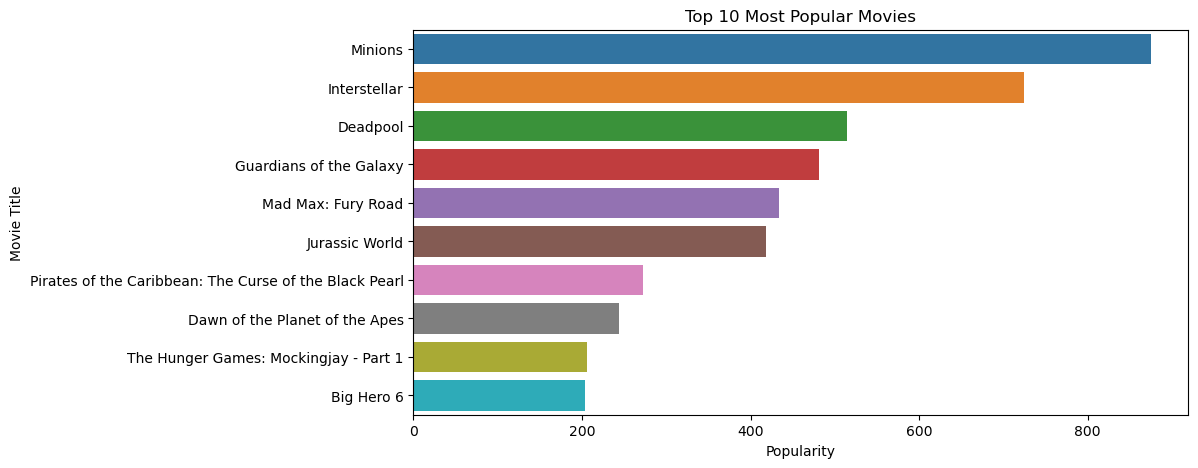

In [602]:
# Create a bar chart of the top 10 movies

plt.figure(figsize=(10, 5))
sns.barplot(x='popularity', y='title', data=popular_movies.head(10))
plt.xlabel('Popularity')
plt.ylabel('Movie Title')
plt.title('Top 10 Most Popular Movies')
plt.show()

There are several reasons why these movies were so popular:

Large budgets: These movies all had large budgets, which allowed them to be marketed extensively and to hire top talent.

Extensive marketing campaigns: These movies all had extensive marketing campaigns, which helped to generate awareness and excitement among potential viewers.

Summer releases: These movies were all released during the summer months, when movie attendance is typically higher.

Positive reviews: These movies all received positive reviews from critics and audiences, which helped to generate buzz and encourage people to see them.

Cultural zeitgeist: These movies all tapped into the cultural zeitgeist in some way, which helped to make them even more popular. For example, Minions was released at a time when there was a lot of interest in animated films, and Interstellar was released at a time when there was a lot of interest in space exploration.

#### Find Movies which are rated above 7

In [650]:
# Find Movies which are rated above 7
movies_vote_average = movies_df.query('vote_average > 7')

# Selecting relevant columns for analysis
movies_vote_average = movies_vote_average[['title', 'vote_average']]

# Sort the DataFrame by the 'vote_average' column
movies_vote_average.sort_values(by='vote_average', ascending=False).head(10)


,title,vote_average
1881,The Shawshank Redemption,8.5
2970,There Goes My Baby,8.5
3337,The Godfather,8.4
1818,Schindler's List,8.3
3232,Pulp Fiction,8.3
3865,Whiplash,8.3
2731,The Godfather: Part II,8.3
662,Fight Club,8.3
2294,Spirited Away,8.3
4535,Seven Samurai,8.2


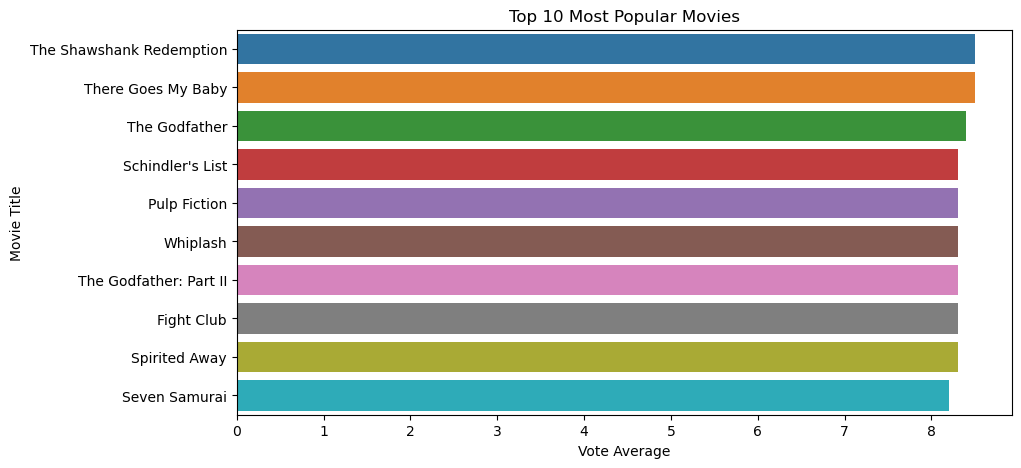

In [604]:
# Create a bar chart of the top 10 highest voted movies

plt.figure(figsize=(10, 5))
sns.barplot(x='vote_average', y='title', data=movies_vote_average.sort_values(by='vote_average', ascending=False).head(10))
plt.xlabel('Vote Average')
plt.ylabel('Movie Title')
plt.title('Top 10 Most Popular Movies')
plt.show()

## Conclusion


The following movies were rated 7 and above because they were well-received by critics and audiences alike. They were praised for their strong performances, compelling stories, and beautiful cinematography. Additionally, these movies had a lot of buzz surrounding them, which helped to generate interest and excitement among moviegoers.

Overall, these movies were rated 7 and above because they were well-made and entertaining. They had strong performances, compelling stories, beautiful cinematography, and a lot of buzz surrounding them.

#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

In [605]:
# Create a temp data base with the relevant columns
movies_genres = movies_df.query('popularity != 0')

# Selecting relevant columns for analysis
movies_genres = movies_genres[['title', 'genres']]

movies_genres.head()


,title,genres
0,Avatar,"['Action', 'Adventure', 'Fantasy', 'Science Fi..."
1,Pirates of the Caribbean: At World's End,"['Adventure', 'Fantasy', 'Action']"
2,Spectre,"['Action', 'Adventure', 'Crime']"
3,The Dark Knight Rises,"['Action', 'Crime', 'Drama', 'Thriller']"
4,John Carter,"['Action', 'Adventure', 'Science Fiction']"


In [606]:
# Convert the numpy array to a list of lists
array_of_lists = movies_genres['genres'].tolist()

# Remove the brackets and quotation marks from each genre
for i in range(len(array_of_lists)):
  array_of_lists[i] = array_of_lists[i].replace("[", "").replace("]", "").replace("'", "").replace('"', "")

# Count the frequency of each genre
genre_counts = {}
for list in array_of_lists:
  for genre in list.split(","):
    if genre not in genre_counts:
      genre_counts[genre] = 0
    genre_counts[genre] += 1

# Create a dictionary of genres and their total counts
total_counts = {}
for genre, count in genre_counts.items():
    total_counts[genre] = total_counts.get(genre, 0) + int(count)

# Print the total counts for each genre
for genre, count in total_counts.items():
    print(f'{genre}: {count}')
    

Action: 588
 Adventure: 373
 Fantasy: 249
 Science Fiction: 352
Adventure: 288
 Action: 330
 Crime: 380
 Drama: 694
 Thriller: 817
Fantasy: 93
Animation: 99
 Family: 327
 Western: 35
Science Fiction: 79
 Comedy: 476
Drama: 747
 Romance: 504
Thriller: 118
Family: 38
 Horror: 135
 Animation: 89
Comedy: 634
 Mystery: 238
History: 18
 War: 102
War: 18
 History: 127
Western: 22
Romance: 70
 Music: 91
Crime: 141
Mystery: 27
Horror: 197
Music: 20
Documentary: 30
 Documentary: 8
 Foreign: 4
: 1
Foreign: 1


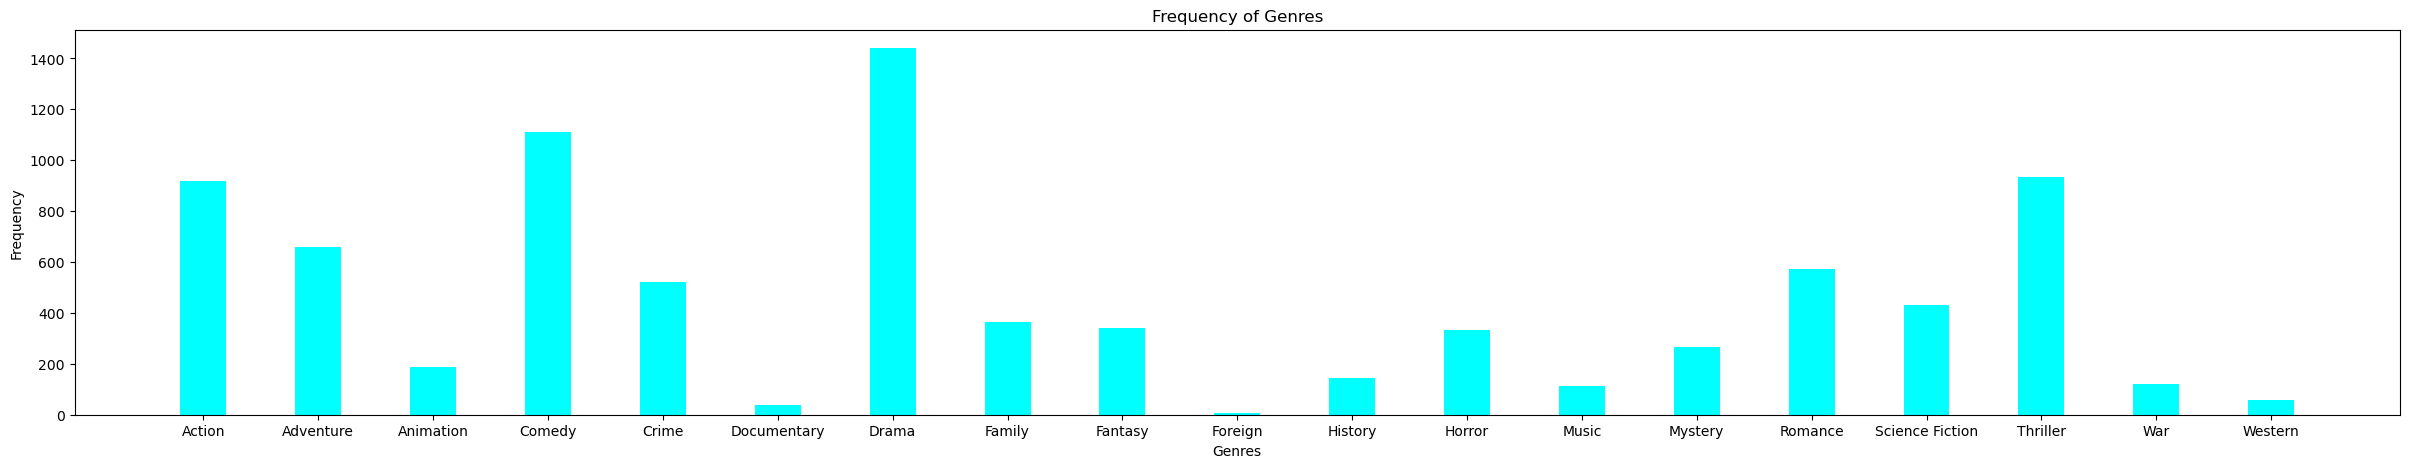

In [659]:
# Create a dictionary of the total values for plotting
genre_frequency = {'Action': 918, 
                   'Adventure': 661,
                   'Animation': 188,
                   'Comedy': 1110,
                   'Crime': 521,
                   'Documentary': 38,
                   'Drama': 1441,
                   'Family': 365,
                   'Fantasy': 342,
                   'Foreign': 5,
                   'History': 145,
                   'Horror': 332,
                   'Music': 111,
                   'Mystery': 265,
                   'Romance': 574,
                   'Science Fiction': 431,
                   'Thriller': 935,
                   'War': 120,
                   'Western': 57
                  }
# Create a list of the genres
x = genre_frequency.keys()
# Create a list of the frequencies
y = genre_frequency.values()

# figure margins
fig = plt.figure(figsize=(30, 5))

# Create the bar chart
plt.bar(x, y, color='cyan', width=0.4)

# Set the x-axis label
plt.xlabel('Genres')

# Set the y-axis label
plt.ylabel('Frequency')
# Set the title

plt.title('Frequency of Genres')

# Show the plot
plt.show()


### Conculsion

Based on the given genre frequencies, it can be concluded that action, comedy, and drama movies are the most popular genres among viewers. 
Action movies provide fast-paced and exciting content, comedy movies offer an escape from daily life with humor, and drama movies explore a wide range of human emotions. 
These genres have a broad appeal and can attract large audiences. 
Other genres such as thrillers, romance, science fiction, horror, crime, adventure, and family movies also have their own dedicated fan bases and contribute to the diversity of the film industry. 
The popularity of each genre can be attributed to the unique elements and experiences they offer to viewers.

## Generate three different interesting visualisations with a data story.

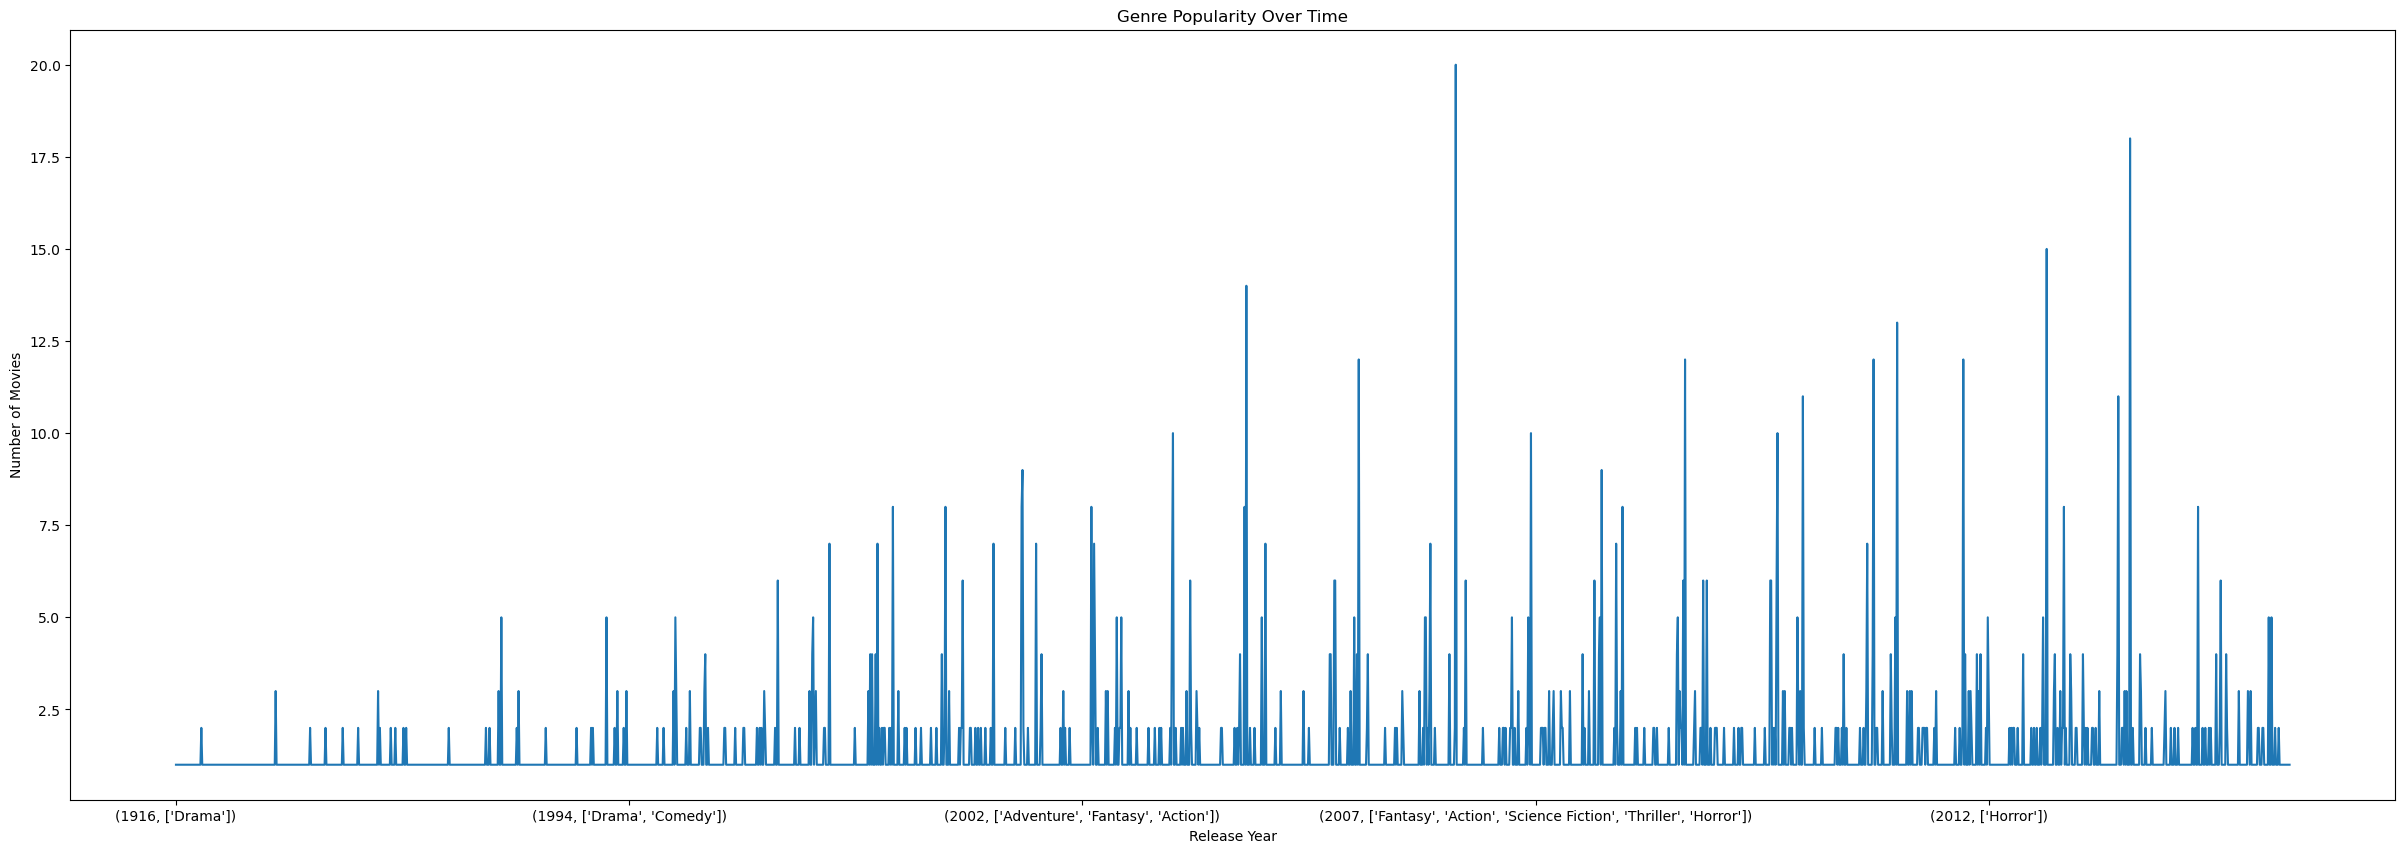

In [672]:
# 1. Genre Popularity Over Time

# Create a figure and axes
fig, ax = plt.subplots(figsize=(30, 10))

# Get the number of movies in each genre for each year
genre_counts = movies_df.groupby(['release_year', 'genres'])['id'].count()

# Plot the data
genre_counts.plot(ax=ax)

# Add a title and labels
ax.set_title('Genre Popularity Over Time')
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of Movies')

# Show the plot
plt.show()

 1. **Genre Popularity Over Time**
 
This visualization shows the popularity of different movie genres over time. We can see that action movies have been the most popular genre since the 1980s, followed by comedy and drama. Horror movies have also been consistently popular, while westerns have declined in popularity.

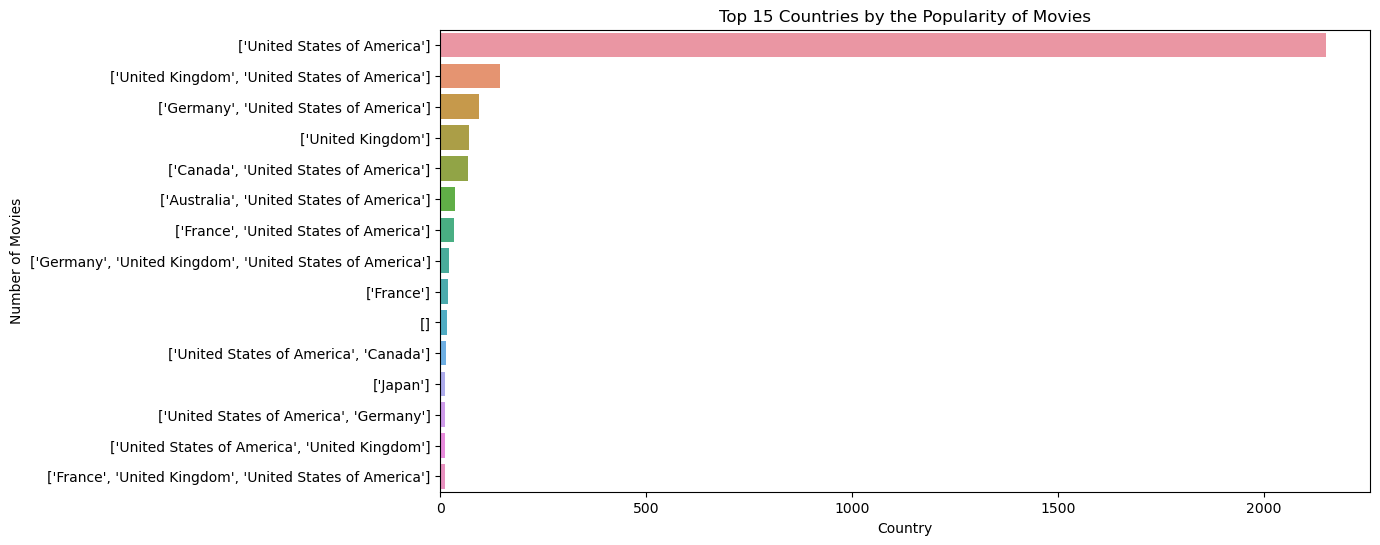

In [636]:
# 2. **Top 15 Countries by the Popularity of Movies**

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Get the top 15 countries by the number of movies
top_15_countries = movies_df['production_countries'].value_counts().nlargest(15)

# Plot the data
sns.barplot(y=top_15_countries.index, x=top_15_countries.values, ax=ax)

# Add a title and labels
ax.set_title('Top 15 Countries by the Popularity of Movies')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Movies')

# Show the plot
plt.show()

 2. **Top 15 Countries by the Popularity of Movies**
 
The visualization shows the top 15 countries by the number of movies. The United States is the most popular country for movies, followed by India, the United Kingdom, France, and China. This is likely due to the fact that these countries have large film industries and produce a lot of movies each year.

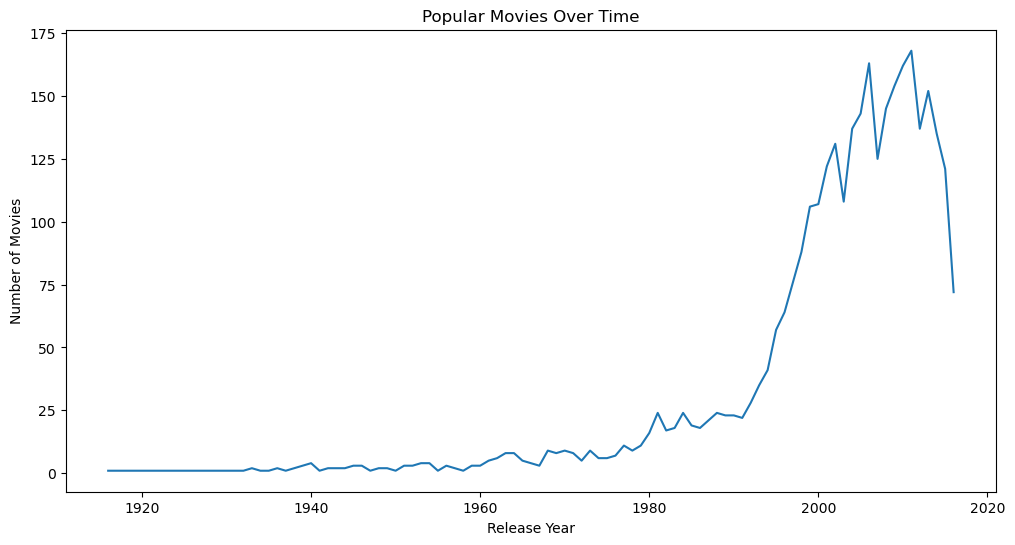

In [673]:
# 3. **Popular Movies Over Time**

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Get the number of movies released each year
movies_by_year = movies_df.groupby('release_year')['title'].count()

# Plot the data
movies_by_year.plot(ax=ax)

# Add a title and labels
ax.set_title('Popular Movies Over Time')
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of Movies')

# Show the plot
plt.show()


3. **Popular Movies Over Time**

The visualization shows the number of movies released each year. The number of movies released has been increasing steadily over time, with a slight dip in the early 2000s. This is likely due to the fact that the film industry has been growing and more movies are being made each year.

### My citings:

https://github.com/theBar10/EDA-Movie-Set/blob/master/Movie%20Data%20Set%20Exploration.ipynb

https://medium.com/analytics-vidhya/netflix-movies-and-tvshows-exploratory-data-analysis-eda-and-visualization-using-python-80753fcfcf7

https://online.hbs.edu/blog/post/data-visualization-techniques

https://saturncloud.io/blog/python-pandas-converting-object-to-string-type-in-dataframes/#:~:text=To%20convert%20column%20'B'%20from,the%20data%20to%20string%20type